In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ml tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# dl tools
# Sequential model to initialize our ANN and Dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense


plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Customer-Churn-Prediction-using-Artificial-Neural-Networks-ANN--main/Customer-Churn-Prediction-using-Artificial-Neural-Networks-ANN--main/Churn_Modelling.csv',index_col='RowNumber')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# GET NUM OF COLOMS AND ROWS
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :13
Number of rows :10000


In [7]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
              'duplicated':df.duplicated().sum(),
              'datatype':df.dtypes
             })

,count,nulls,nulls%,cardinality,duplicated,datatype
CustomerId,10000,0,0.0,10000,0,int64
Surname,10000,0,0.0,2932,0,object
CreditScore,10000,0,0.0,460,0,int64
Geography,10000,0,0.0,3,0,object
Gender,10000,0,0.0,2,0,object
Age,10000,0,0.0,70,0,int64
Tenure,10000,0,0.0,11,0,int64
Balance,10000,0,0.0,6382,0,float64
NumOfProducts,10000,0,0.0,4,0,int64
HasCrCard,10000,0,0.0,2,0,int64


In [8]:
# some unnecessary columns removed
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

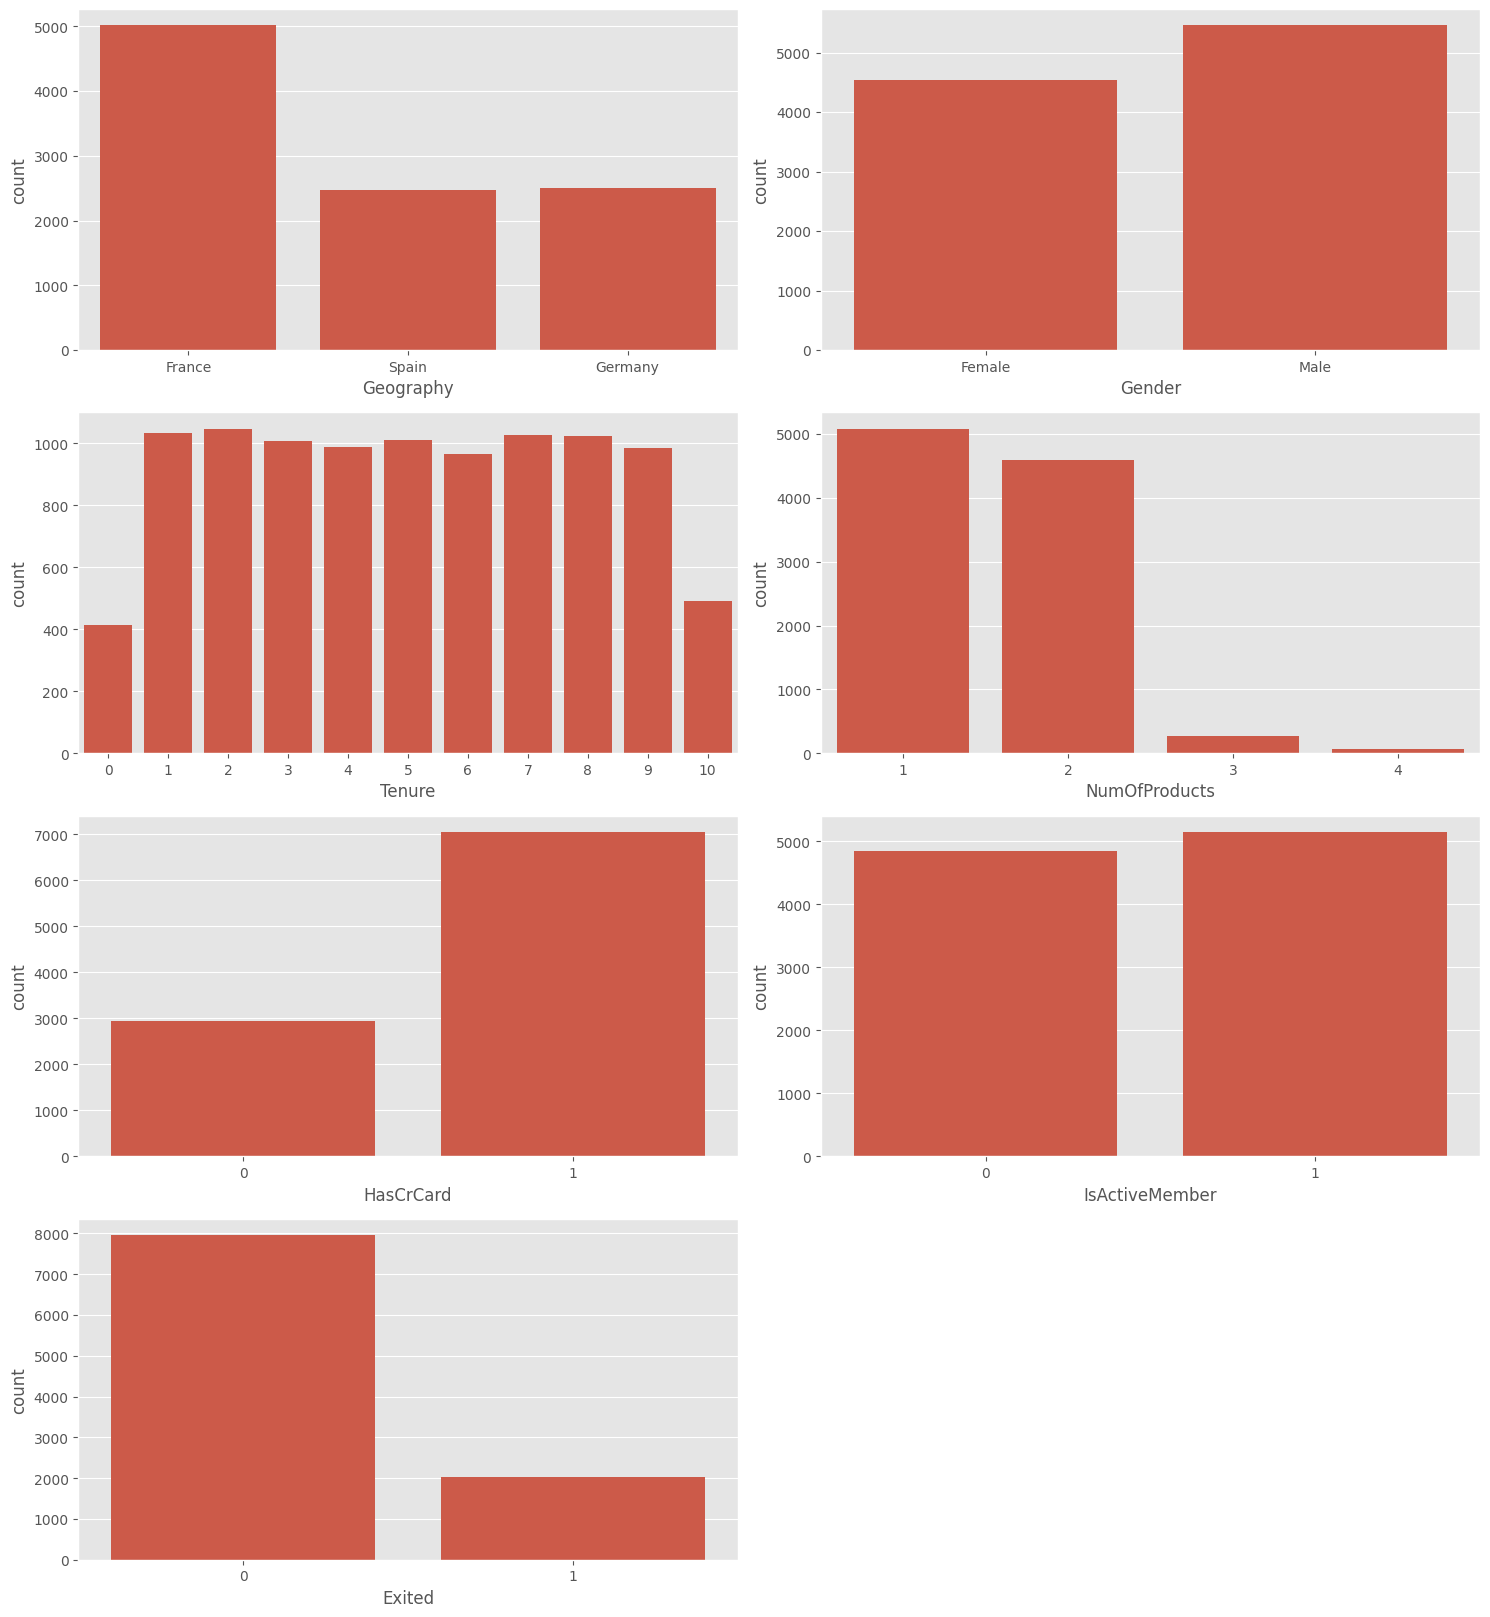

In [12]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column) 

plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

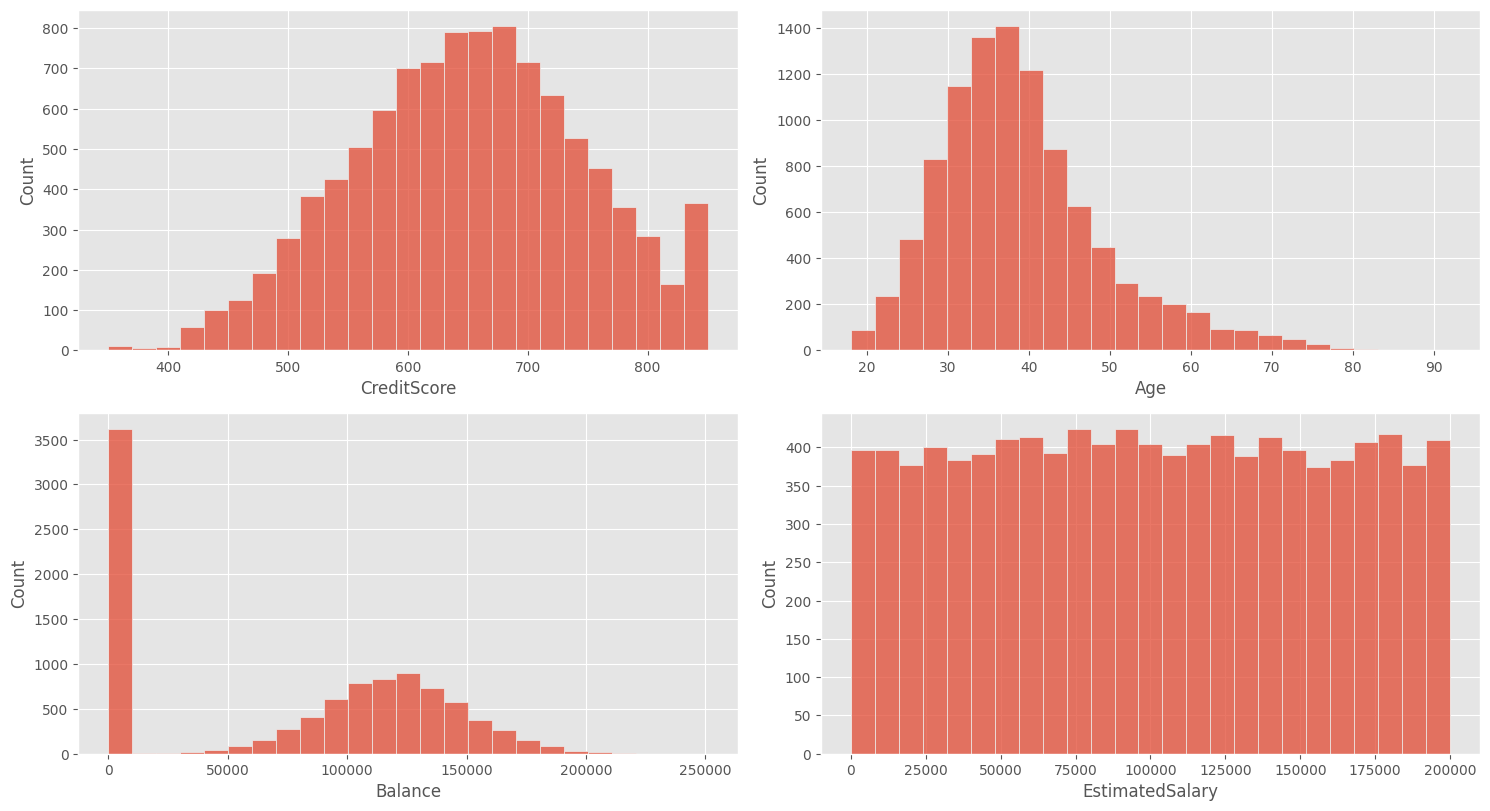

In [13]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

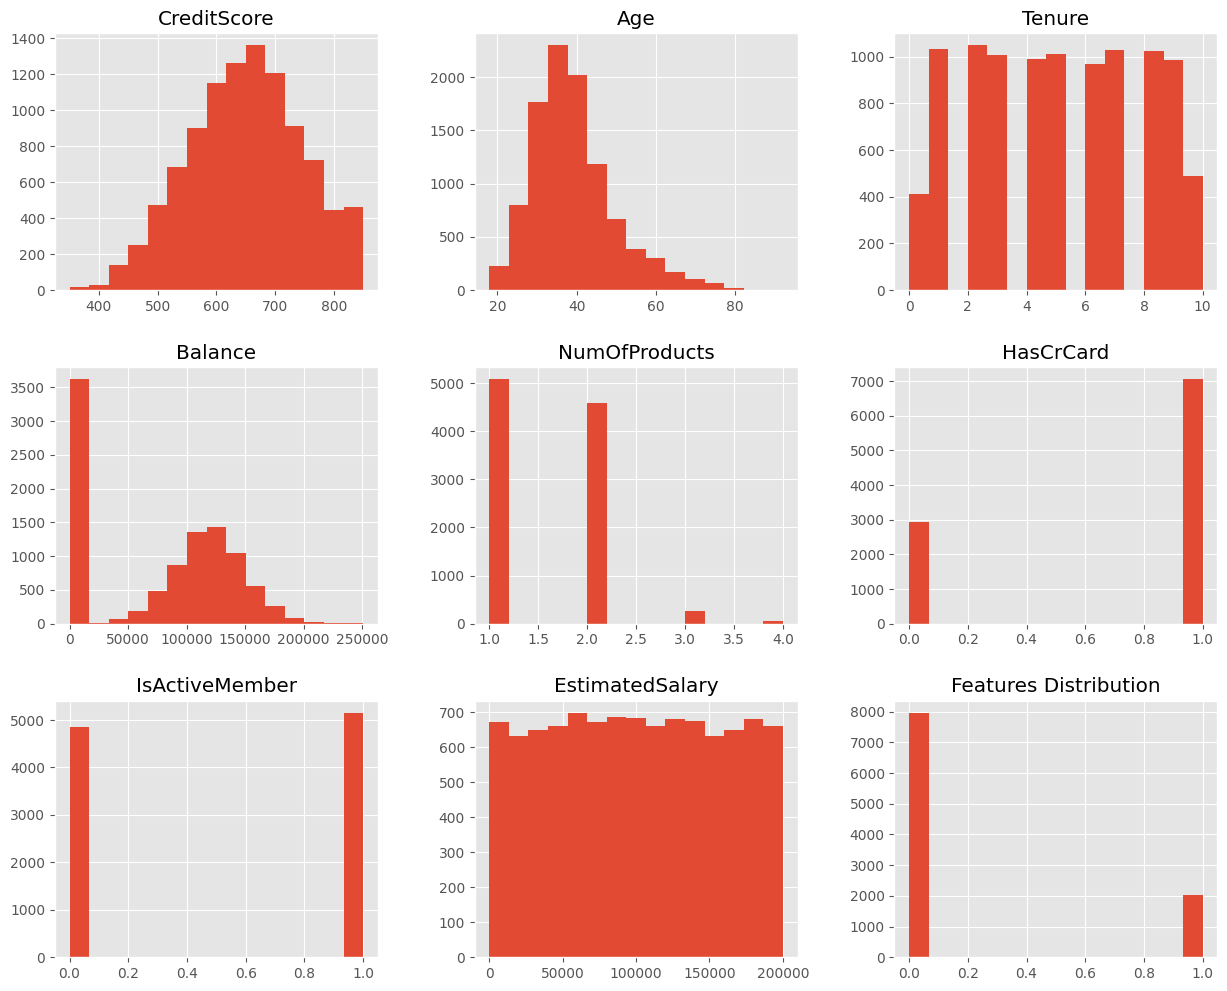

In [15]:
# distribution of all features
df.hist(figsize=(15,12), bins=15)
plt.title("Features Distribution")
plt.show()

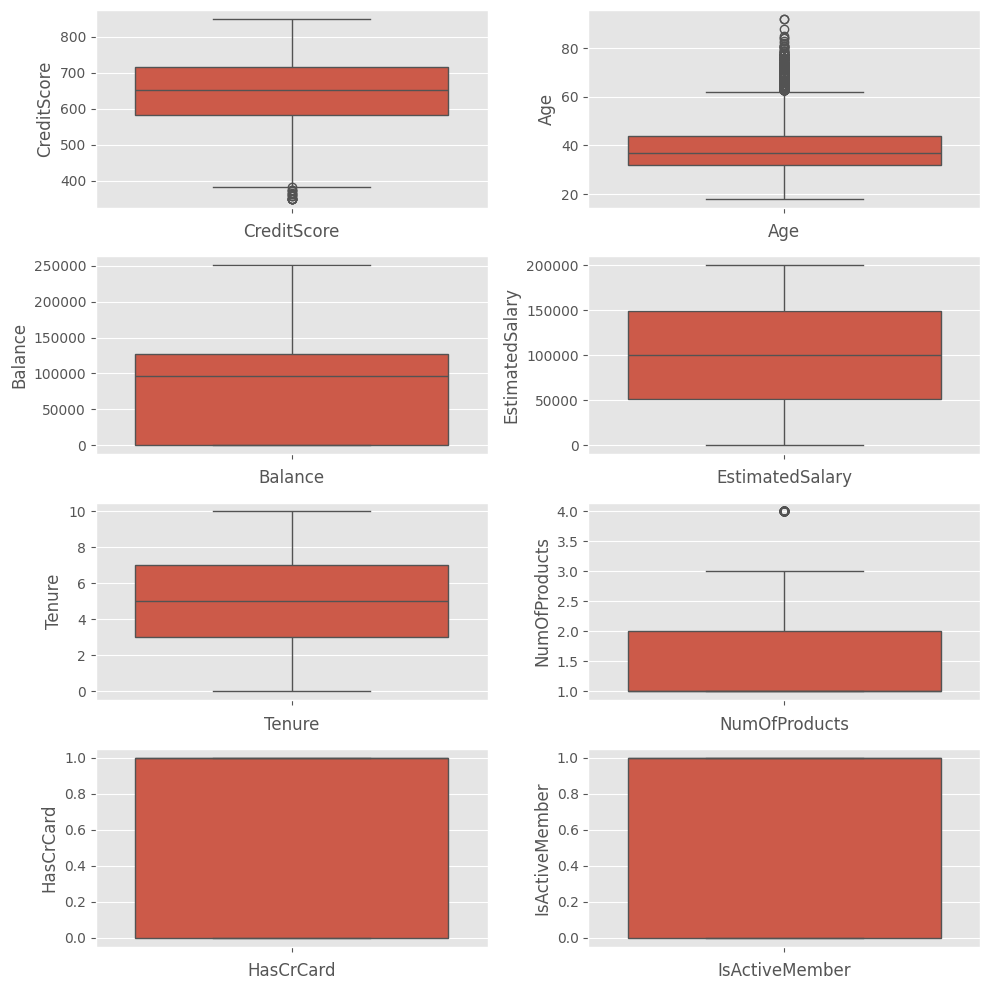

In [16]:
fig, axs = plt.subplots(4,2, figsize = (10,10))
plt1 = sns.boxplot(df['CreditScore'], ax = axs[0,0]).set(xlabel= 'CreditScore')
plt2 = sns.boxplot(df['Age'], ax = axs[0,1]).set(xlabel='Age')
plt1 = sns.boxplot(df['Balance'], ax = axs[1,0]).set(xlabel='Balance')
plt2 = sns.boxplot(df['EstimatedSalary'], ax = axs[1,1]).set(xlabel='EstimatedSalary')
plt1 = sns.boxplot(df['Tenure'], ax = axs[2,0]).set(xlabel= 'Tenure')
plt2 = sns.boxplot(df['NumOfProducts'], ax = axs[2,1]).set(xlabel='NumOfProducts')
plt1 = sns.boxplot(df['HasCrCard'], ax = axs[3,0]).set(xlabel='HasCrCard')
plt2 = sns.boxplot(df['IsActiveMember'], ax = axs[3,1]).set(xlabel='IsActiveMember')

plt.tight_layout()

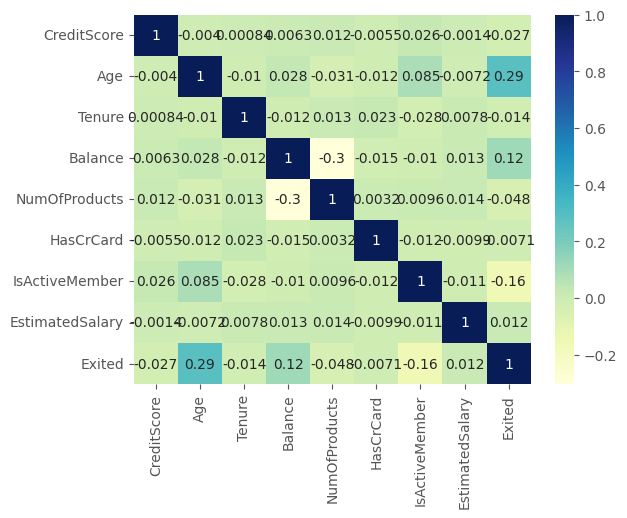

In [17]:
dataplot = sns.heatmap(df.corr(numeric_only = True),cmap='YlGnBu',annot=True)
plt.show()

In [18]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

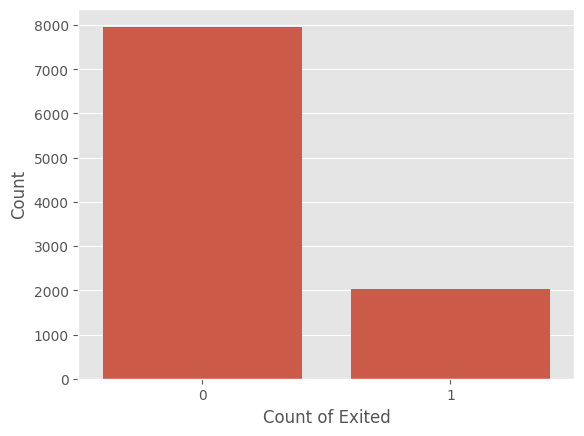

In [19]:
sns.countplot(x=df['Exited'])
plt.xlabel('Count of Exited')
plt.ylabel('Count')
plt.show()

In [20]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [21]:
df['Geography']= df['Geography'].map({'France':0,'Germany':1,'Spain':2})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [22]:
df_data_encoded = df

In [23]:
df_data_encoded

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


In [24]:
x = df_data_encoded.drop(['Exited'], axis=1)
y = df_data_encoded.Exited

In [25]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88
2,608,2,0,41,1,83807.86,1,0,1,112542.58
3,502,0,0,42,8,159660.80,3,1,0,113931.57
4,699,0,0,39,1,0.00,2,0,0,93826.63
5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [26]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [27]:
# Splitting the dataset into the Training set and Test sets
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [28]:
# Feature scaling because yes we don't want one independent variable dominating the other and it makes computations easy
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
x_train.shape

(8000, 10)

In [30]:
model = Sequential(
[
    # Adding the input layer and the first hidden layer
    Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=10),
    # Adding the second hidden layer
    Dense(units=6, kernel_initializer='uniform', activation='relu'),
    # Adding the output layer
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid'),
]
)

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Fitting the ANN to the Training set
history = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=0)

In [32]:
history.history

{'accuracy': [0.7957500219345093,
  0.7960000038146973,
  0.7960000038146973,
  0.7994999885559082,
  0.8207499980926514,
  0.8258749842643738,
  0.8274999856948853,
  0.8289999961853027,
  0.8320000171661377,
  0.8321250081062317,
  0.8336250185966492,
  0.8341249823570251,
  0.8345000147819519,
  0.8343750238418579,
  0.8341249823570251,
  0.8345000147819519,
  0.8347499966621399,
  0.8336250185966492,
  0.8337500095367432,
  0.8347499966621399,
  0.8337500095367432,
  0.8349999785423279,
  0.8349999785423279,
  0.8351250290870667,
  0.8347499966621399,
  0.8333749771118164,
  0.8355000019073486,
  0.8357499837875366,
  0.8351250290870667,
  0.8357499837875366,
  0.8360000252723694,
  0.8355000019073486,
  0.8355000019073486,
  0.8353750109672546,
  0.8357499837875366,
  0.8351250290870667,
  0.8360000252723694,
  0.8366249799728394,
  0.8364999890327454,
  0.8347499966621399,
  0.8355000019073486,
  0.8364999890327454,
  0.8363749980926514,
  0.8370000123977661,
  0.8358749747276306

In [33]:
score, acc = model.evaluate(x_train, y_train,batch_size=10)
print('Train score', score)
print('Train accuracy', acc)

800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.8415 - loss: 0.3938
Train score 0.3968883454799652
Train accuracy 0.8368750214576721


In [34]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.843

Text(0.5, 23.52222222222222, 'Prediction label')

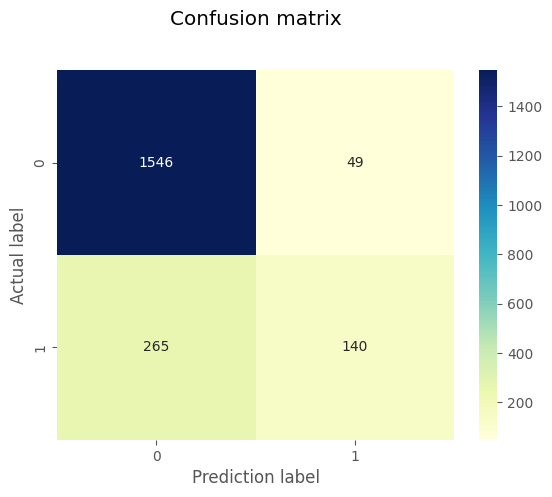

In [37]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [38]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.74      0.35      0.47       405

    accuracy                           0.84      2000
   macro avg       0.80      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


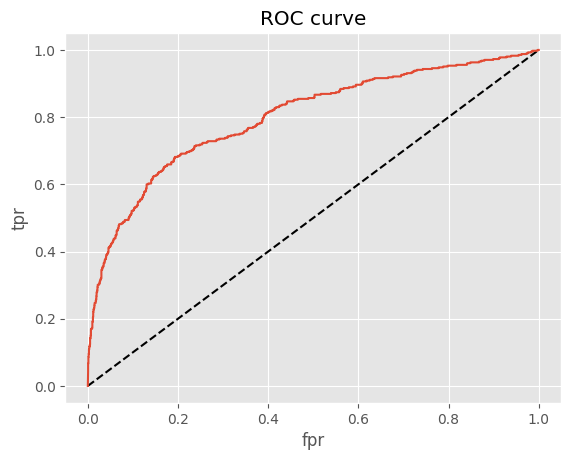

In [39]:
from sklearn.metrics import roc_curve

# Predict probabilities using the model
y_pred_proba = model.predict(x_test)

# Assuming y_test is binary (0 and 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [40]:
x_test_reshaped = x_test[5].reshape(1, -1)
result = model.predict(x_test_reshaped)
(result > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1]])

In [41]:
y_test.iloc[5]

1

In [42]:
import pandas as pd
import numpy as np

def pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    features = np.array([CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary])
    features = features.reshape(1, -1)  # Reshape to (1, input_dim)
    result = model.predict(features)
    result = (result > 0.5).astype(int)
    return result

In [43]:
# Example usage:
CreditScore = 619
Geography = 0
Gender = 0
Age = 42
Tenure = 2
Balance = 0.0
NumOfProducts = 1
HasCrCard = 1
IsActiveMember = 1
EstimatedSalary = 101348.88

result = pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0]]


In [44]:
if result == 1:
    print("Churn")
else:
    print("Not Churn")

Not Churn


In [45]:
df.iloc[0]

CreditScore           619.00
Geography               0.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Exited                  1.00
Name: 1, dtype: float64

In [ ]:
# 619	France	Female	42	2	0.00	1	1	1	101348.88	1

In [46]:
# Example usage:
CreditScore = 608
Geography = 2
Gender = 0
Age = 41
Tenure = 1
Balance = 83807.86
NumOfProducts = 1
HasCrCard = 0
IsActiveMember = 1
EstimatedSalary = 112542.58

result = pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0]]


In [ ]:
# 608	2	0	41	1	83807.86	1	0	1	112542.58	0

In [47]:
if result == 1:
    print("Churn")
else:
    print("Not Churn")

Not Churn


In [48]:
model.save('model.keras')